In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'E:\hacktiv8\ftds009\dataset\data-2.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df['GMV'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['InvoiceDate'].aggregate({'min','max'})

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df2 = df[(df['GMV']>0)&(df['CustomerID']>0)][['Country','GMV']].groupby('Country').sum().sort_values('GMV',ascending=False)

In [ ]:
df3 = df[df['GMV']>0][['Country','CustomerID']].groupby(['Country']).nunique().sort_values('CustomerID',ascending=False)

In [ ]:
df4 = df3.join(df2,on='Country')
df4['GMV per Customer'] = df4['GMV'] / df4['CustomerID']
df4.rename(columns={'CustomerID':'CustomerCount'}).sort_values(['GMV per Customer','CustomerCount'],ascending=False,inplace=True)

In [ ]:
df4

,CustomerID,GMV,GMV per Customer
Country,,,
United Kingdom,3920,7308391.554,1864.385601
Germany,94,228867.140,2434.756809
France,87,209024.050,2402.575287
Spain,30,61577.110,2052.570333
Belgium,25,41196.340,1647.853600
Switzerland,21,56443.950,2687.807143
Portugal,19,33439.890,1759.994211
Italy,14,17483.240,1248.802857
Finland,12,22546.080,1878.840000


In [ ]:
df4.loc[['United Kingdom','Germany','USA']]

,CustomerID,GMV,GMV per Customer
Country,,,
United Kingdom,3920,7308391.554,1864.385601
Germany,94,228867.140,2434.756809
USA,4,3580.390,895.097500


In [ ]:
df_Germany = df[(df['Country']=='Germany') & (df['GMV']>0)].copy()

In [ ]:
df_Germany.sort_values(['GMV','Quantity'],ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
378279,569640,22423,REGENCY CAKESTAND 3 TIER,80,2011-10-05 12:25:00,10.95,12471.0,Germany,876.00
534968,581179,22423,REGENCY CAKESTAND 3 TIER,64,2011-12-07 15:43:00,10.95,12471.0,Germany,700.80
410820,572134,23427,STOOL HOME SWEET HOME,60,2011-10-21 10:13:00,10.40,12500.0,Germany,624.00
479544,577168,22423,REGENCY CAKESTAND 3 TIER,56,2011-11-18 10:42:00,10.95,12603.0,Germany,613.20
398150,571223,M,Manual,1,2011-10-14 13:36:00,599.50,13810.0,Germany,599.50
...,...,...,...,...,...,...,...,...,...
210534,555282,23224,CHERUB HEART DECORATION GOLD,1,2011-06-02 09:04:00,0.83,12709.0,Germany,0.83
210535,555282,23221,REINDEER HEART DECORATION SILVER,1,2011-06-02 09:04:00,0.83,12709.0,Germany,0.83
494776,578273,23309,SET OF 60 I LOVE LONDON CAKE CASES,1,2011-11-23 13:41:00,0.55,14335.0,Germany,0.55
494775,578273,22999,TRAVEL CARD WALLET VINTAGE LEAF,1,2011-11-23 13:41:00,0.42,14335.0,Germany,0.42


## UK

In [ ]:
df_UK = df[(df['Country']=='United Kingdom') & (df['GMV']>0)].copy()

In [ ]:
df_UK.sort_values(['GMV','Quantity'],ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080,16446.0,United Kingdom,168469.600
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom,77183.600
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,15098.0,United Kingdom,38970.000
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.330,NaN,United Kingdom,13541.330
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.060,NaN,United Kingdom,11062.060
...,...,...,...,...,...,...,...,...,...
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom,0.060
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001


In [ ]:
df_UK.sort_values('InvoiceDate',ascending=True,inplace=True)
df_UK['Month'] = df_UK['InvoiceDate'].dt.to_period('M')
UK_monthly_GMV = df_UK[['Month','GMV']].groupby('Month').sum().set_index()
UK_monthly_GMV

NameError: ignored

TypeError: float() argument must be a string or a real number, not 'Period'

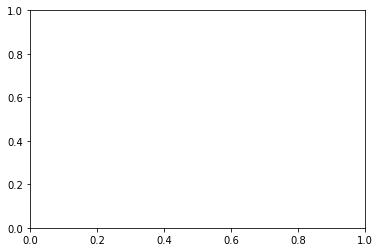

In [ ]:
fig = plt.plot(UK_monthly_GMV.index[:-1],UK_monthly_GMV[:-1]['GMV'])
plt.title("Yearly UK GMV")
plt.xlabel("Month")
plt.ylabel("GMV in MUSD")

## USA

In [ ]:
df_USA = df[(df['Country']=='USA') & (df['GMV']>0)].copy()

In [ ]:
df_USA.sort_values('InvoiceDate',ascending=True,inplace=True)


In [ ]:
df_USA['Month'] = df_USA['InvoiceDate'].dt.to_period('M')


In [ ]:
USA_monthly_GMV = df_USA[['Month','GMV']].groupby('Month').sum().reset_index
USA_monthly_GMV

In [ ]:
fig = plt.plot(USA_monthly_GMV.index[:-1],USA_monthly_GMV[:-1]['GMV'])
plt.title("Yearly USA GMV")
plt.xlabel("Month")
plt.ylabel("GMV in MUSD")